In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 学習用データの読み込み
df = np.loadtxt('../files/click.csv', delimiter=',', skiprows=1)

In [3]:
df.shape

(20, 2)

In [4]:
train_x = df[:, 0]
train_y = df[:, 1]

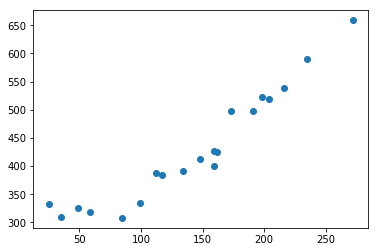

In [5]:
plt.plot(train_x, train_y, 'o')

１次関数での予測
---

### 予測関数
$f\theta(x) = \theta_0 + \theta_1x$  

### 目的関数
$\displaystyle E(\theta) = \frac{1}{2}\sum_{i=1}^n(y_i - f\theta(x_i))^2$

In [6]:
# パラメータを初期化(乱数)
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [8]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### データの標準化(正規化)

$\displaystyle z^{(i)} = \frac{x^{(i)} - \mu}{\sigma}$
- 平均を0
- 分散を1にする

In [9]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [10]:
train_z = standardize(train_x)

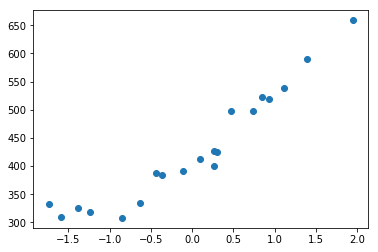

In [11]:
plt.plot(train_z, train_y, 'o')

- 横軸のスケールだけが変わる

### パラメタ更新式

$\displaystyle \theta_0 := \theta_0 - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})$

$\displaystyle \theta_1 := \theta_1 - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}$

In [12]:
# 学習率
ETA = 1e-3

In [13]:
# 誤差の差分
diff = 1

In [14]:
# 更新回数
count = 0

In [15]:
# 学習
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    # パラメタを更新
    theta0 = tmp0
    theta1 = tmp1
    # 前回との誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    # ログ出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 9.523, theta1 = 1.879, 差分 = 76065.1967
2回目: theta0 = 17.916, theta1 = 3.711, 差分 = 73053.0149
3回目: theta0 = 26.140, theta1 = 5.506, 差分 = 70160.1155
4回目: theta0 = 34.200, theta1 = 7.266, 差分 = 67381.7750
5回目: theta0 = 42.099, theta1 = 8.990, 差分 = 64713.4567
6回目: theta0 = 49.840, theta1 = 10.680, 差分 = 62150.8038
7回目: theta0 = 57.427, theta1 = 12.336, 差分 = 59689.6320
8回目: theta0 = 64.861, theta1 = 13.959, 差分 = 57325.9225
9回目: theta0 = 72.147, theta1 = 15.549, 差分 = 55055.8160
10回目: theta0 = 79.287, theta1 = 17.108, 差分 = 52875.6057
11回目: theta0 = 86.284, theta1 = 18.635, 差分 = 50781.7317
12回目: theta0 = 93.142, theta1 = 20.132, 差分 = 48770.7751
13回目: theta0 = 99.862, theta1 = 21.599, 差分 = 46839.4524
14回目: theta0 = 106.447, theta1 = 23.036, 差分 = 44984.6101
15回目: theta0 = 112.902, theta1 = 24.445, 差分 = 43203.2196
16回目: theta0 = 119.227, theta1 = 25.826, 差分 = 41492.3721
17回目: theta0 = 125.425, theta1 = 27.179, 差分 = 39849.2741
18回目: theta0 = 131.499, theta1 = 28.505, 差分 = 38271.2429
19

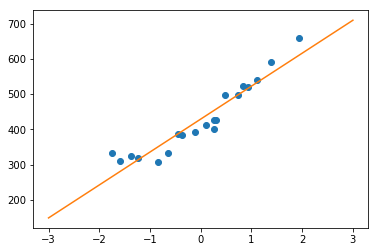

In [16]:
# 学習結果を描画
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))

### 予測/検証

In [17]:
f(standardize(100))

370.96752253973983

In [18]:
f(standardize(200))

510.46981434716116

In [19]:
f(standardize(300))

649.9721061545824